# SVM

In [1]:
import numpy as np
import pandas as pd #使用pandas读文件
import matplotlib.pyplot as plt#绘制图形
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score#交叉验证
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler #最大最小值放缩
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
# 用split好的数据集进行处理
TrainingSet2=pd.read_csv("train_hf_data.csv")
TestSet1=pd.read_csv("test_hf_data.csv")
TrainingSet2=TrainingSet2.drop(['Unnamed: 0'], axis=1)
TestSet1=TestSet1.drop(['Unnamed: 0'], axis=1)

#标签集
lf1=pd.read_csv("train_hf_label.csv")
lf2=pd.read_csv("test_hf_label.csv")
lf1=lf1.drop(['Unnamed: 0'], axis=1)
lf2=lf2.drop(['Unnamed: 0'], axis=1)

# 将所有数据转为数组形式并归一化
X_arr=np.array(TrainingSet2)
Xt_arr=np.array(TestSet1)
Y=np.array(lf1).ravel()
Yt=np.array(lf2).ravel()

#归一化
scaler = MinMaxScaler()
scaler.fit(X_arr)
X = scaler.transform(X_arr)
Xt = scaler.transform(Xt_arr)

print(X.shape, Y.shape, Xt.shape, Yt.shape)


(240, 12) (240,) (59, 12) (59,)


In [207]:
#GridSearchCV 用于系统地遍历多种参数组合，通过交叉验证确定最佳效果参数。
#它的好处是:只需增加几行代码，就能遍历多种组合，并返回效果最好的参数
#SVC的参数可以选择linear还是rbf等，然后C值也可以从1~10

# small regularization params

parameters1 = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C': np.arange(1, 100).tolist()}
clf1 = GridSearchCV(svr, parameters1)
clf1.fit(X, Y)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [4]:
print(f"best params: {clf1.best_params_}, best score: {clf1.best_score_}")

best params: {'C': 22, 'kernel': 'linear'}, best score: 0.8208333333333334


In [25]:
# large regularization params
svr = svm.SVC()

Cs = [1,  1e2,  1e4,  1e6, 1e7]
kernels = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': kernels, 'C': Cs}
clf = GridSearchCV(svr, parameters, scoring='accuracy', return_train_score=True)
clf.fit(X, Y)
print(f"best params: {clf.best_params_}, best score: {clf.best_score_}")

best params: {'C': 1000000.0, 'kernel': 'linear'}, best score: 0.825


In [208]:
# visualization of GridSearchCV 

scores = [x[1] for x in clf.cv_results_]
scores = np.array(scores).reshape(len(Cs))

for ind, i in enumerate(Cs):
    plt.plot(Cs, scores[ind], label='C: ' + str(i))

plt.legend()
plt.xlabel('kernels')
plt.ylabel('Mean score')
plt.show()

AttributeError: 'function' object has no attribute 'cv_results_'

In [19]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

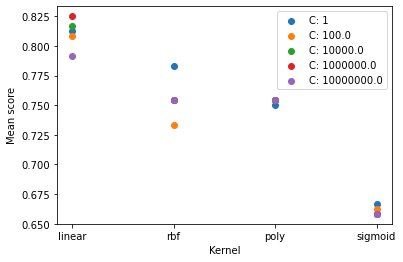

In [26]:
test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score'] 

scores = [x for x in test_scores]
scores = np.array(scores).reshape(len(Cs), len(kernels))

# plt.plot(test_scores, label='test')
# plt.plot(train_scores, label='train')
# plt.legend(loc='best')
# plt.show()
for ind, i in enumerate(Cs):
    plt.scatter(kernels, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Kernel')
plt.ylabel('Mean score')
plt.show()

In [34]:
pip install sklearn-evaluation

     |████████████████████████████████| 45 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:title={'center':'Grid search results'}, xlabel='C', ylabel='Mean score'>

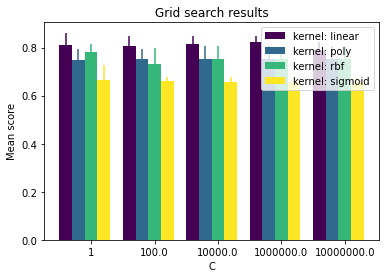

In [36]:
from sklearn_evaluation import plot


plot.grid_search(clf.cv_results_, change='C', kind='bar')

<AxesSubplot:>

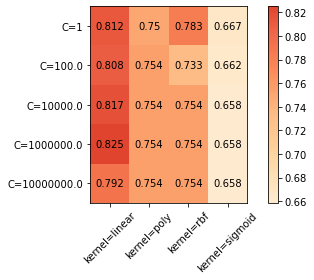

In [38]:
plot.grid_search(clf.cv_results_, change=('C', 'kernel'))

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [50]:
# use the parameter with best accuracy to train the model

model = svm.SVC(kernel='linear', C=1e6)
model.fit(X, Y)
y_pred = model.predict(Xt)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [51]:
acc = accuracy_score(y_pred, Yt)
acc

0.864406779661017

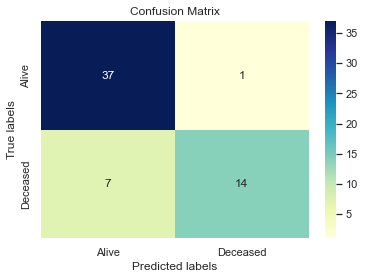

In [68]:
from sklearn.metrics import confusion_matrix
# use seaborn plotting defaults
import seaborn as sns; sns.set()

cm = confusion_matrix(Yt, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Alive', 'Deceased']); ax.yaxis.set_ticklabels(['Alive', 'Deceased']);

plt.savefig('confusion_mat.png')

# Feature selection: PCA

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
data_scaled = pd.DataFrame(Xt,columns = TrainingSet2.columns) 

X_new = pca.fit_transform(Xt)
eigenvalues = pca.explained_variance_
print("Explained variance: \n", eigenvalues)

Explained variance: 
 [0.35605365 0.27958327 0.24185869 0.21102265 0.1190046  0.0726244
 0.05340112 0.04359697 0.02181504 0.01920063 0.0090228  0.00351759]


In [40]:
display(pd.DataFrame(pca.components_,columns=data_scaled.columns))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.054984,0.525775,-0.002008,-0.006026,0.108806,0.082230,-0.019471,0.053508,-0.014652,-0.520818,-0.652531,-0.037300
1,0.024862,0.321673,-0.004673,0.721724,-0.122347,0.521257,0.019223,-0.027999,0.000654,0.003454,0.292411,-0.040662
2,0.038871,-0.276869,-0.022084,-0.479409,-0.057796,0.744668,0.031562,-0.006529,-0.052436,-0.335018,0.130739,-0.022863
3,-0.020990,-0.705152,0.010734,0.490830,0.235901,-0.048485,0.089965,-0.030953,-0.034975,-0.355113,-0.257149,-0.028007
4,0.096814,-0.140067,0.011922,0.021264,-0.136481,0.309695,0.002650,0.025075,-0.050560,0.617513,-0.573130,-0.378000
5,0.247395,0.099037,-0.038882,-0.054955,0.432210,-0.101878,0.004271,0.047811,0.001262,-0.116848,0.261668,-0.801774
6,-0.110815,0.032935,-0.008515,-0.003203,0.742346,0.217549,-0.385086,0.266554,-0.023742,0.259471,-0.004245,0.317645
7,-0.859211,0.037588,0.033147,-0.046752,0.153821,0.055029,0.413239,-0.101879,0.066154,0.092424,0.050168,-0.183817
8,0.125637,0.008435,-0.006988,0.010459,-0.039953,-0.019145,0.529171,0.827306,-0.101896,0.012264,0.027073,0.079366
9,0.385566,0.107313,-0.110948,-0.046976,0.359045,0.069165,0.622531,-0.456469,0.065096,0.138552,-0.059698,0.262111


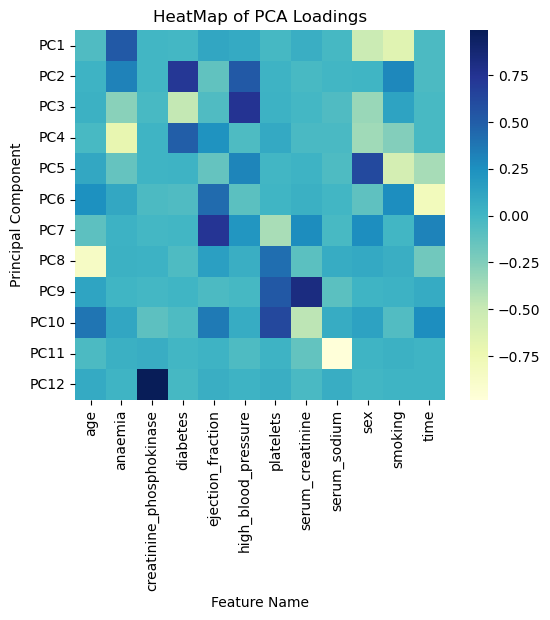

In [209]:

ax= plt.subplot()
sns.heatmap(pca.components_, cmap='YlGnBu', ax=ax)

ax.set_xlabel('Feature Name');ax.set_ylabel('Principal Component'); 
ax.set_title('HeatMap of PCA Loadings'); 
ax.xaxis.set_ticklabels(list(data_scaled.columns), rotation=90); ax.yaxis.set_ticklabels([ "PC"+str(x) for x in range(1,pca.n_components_+1)], rotation=0);

ax.set_aspect("equal")

Populating the interactive namespace from numpy and matplotlib
[0.2488665  0.44428342 0.61333245 0.76082839 0.8440076  0.89476899
 0.93209412 0.96256657 0.97781436 0.99123479 0.99754135 1.        ]


/Users/gloriatan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes', 'plot', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


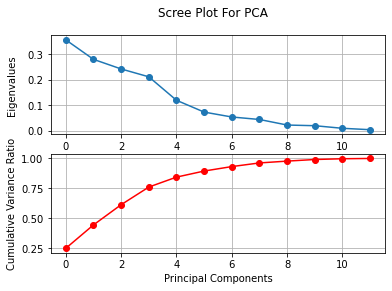

In [41]:
%pylab inline
#  Scree plot 
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.align_ylabels()
fig.suptitle('Scree Plot For PCA')
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
# explained variance 
ax1.plot(eigenvalues,'o-')
ax1.set_ylabel('Eigenvalues')
ax1.grid()
cumulative_sum = np.cumsum(eigenvalues)
print(cumulative_sum/cumulative_sum[-1])
# cumulative Variance Ratio
ax2.plot(cumulative_sum/cumulative_sum[-1],'o-r')
ax2.set_xlabel('Principal Components')
ax2.set_ylabel('Cumulative Variance Ratio');

ax2.grid()

In [72]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)

initial_feature_names = data_scaled.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {f"PC{i+1}": most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))
df

[10, 3, 5, 1, 9, 11, 4, 0, 7, 6, 8, 2]


,0,1
0,PC1,smoking
1,PC10,platelets
2,PC11,serum_sodium
3,PC12,creatinine_phosphokinase
4,PC2,diabetes
5,PC3,high_blood_pressure
6,PC4,anaemia
7,PC5,sex
8,PC6,time
9,PC7,ejection_fraction


In [205]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,2] # projection on PC1
    ys = score[:,3] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    
    fig, ax = plt.subplots(figsize=(8,6));
    cmap_bold = ListedColormap(['#CC0000', '#00AA00'])
    
    for s,l in enumerate(classes):
        scatter = ax.scatter(xs[y==l],ys[y==l], cmap=cmap_bold, marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,2], coeff[i,3], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,2]* 1.05, coeff[i,3] * 1.05, TrainingSet2.columns[i], color = 'k', ha = 'center', va = 'center', fontsize=15, rotation=45)

    plt.xlabel("PC{}".format(3), size=14)
    plt.ylabel("PC{}".format(4), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

<Figure size 1000x800 with 0 Axes>

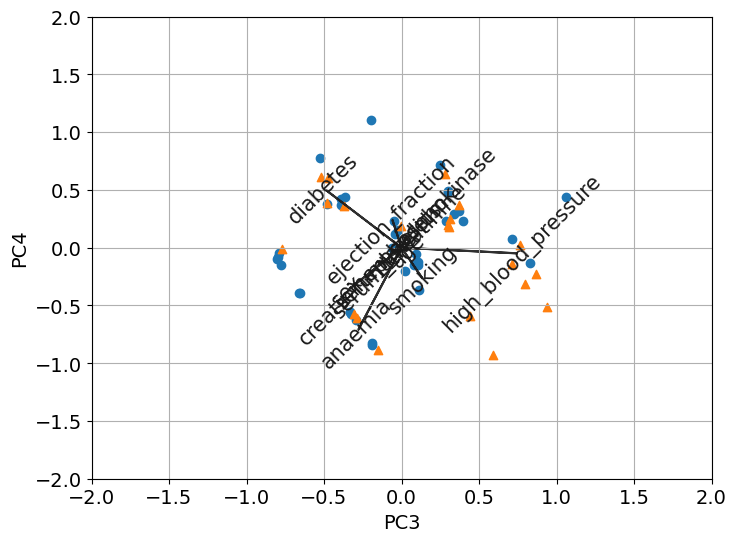

In [206]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:12], np.transpose(pca.components_[0:12, :]), Yt)
plt.show()

In [44]:
vars(pca)

{'n_components': 12,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'random_state': None,
 'n_features_in_': 12,
 '_fit_svd_solver': 'full',
 'mean_': array([0.37801757, 0.50847458, 0.04690831, 0.45762712, 0.51977401,
        0.33898305, 0.34560029, 0.11818701, 0.68716707, 0.72881356,
        0.37288136, 0.39487273]),
 'noise_variance_': 0.0,
 'n_samples_': 59,
 'n_features_': 12,
 'components_': array([[-5.49840739e-02,  5.25774872e-01, -2.00769135e-03,
         -6.02615563e-03,  1.08805903e-01,  8.22298201e-02,
         -1.94712295e-02,  5.35082528e-02, -1.46515224e-02,
         -5.20818425e-01, -6.52530999e-01, -3.72995529e-02],
        [ 2.48616304e-02,  3.21673146e-01, -4.67348169e-03,
          7.21723527e-01, -1.22347347e-01,  5.21257417e-01,
          1.92232038e-02, -2.79993738e-02,  6.54002749e-04,
          3.45407542e-03,  2.92411018e-01, -4.06616422e-02],
        [ 3.88714323e-02, -2.76868898e-01, -2.20841666e-02,
         